In [22]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models


In [23]:
# Load all CSV files
def load_data(data_dir='data'):
    all_data = []
    labels = []

    for file in os.listdir(data_dir):
        if file.endswith('.csv'):
            label = file.replace('.csv', '')
            filepath = os.path.join(data_dir, file)
            data = pd.read_csv(filepath, header=None)
            all_data.append(data)
            labels.extend([label] * len(data))

    X = pd.concat(all_data, ignore_index=True)
    y = np.array(labels)
    return X, y

X, y = load_data()
print("Data shape:", X.shape)
print("Labels:", np.unique(y))


Data shape: (482, 63)
Labels: ['A' 'B' 'ThumbsUp' 'V']


In [24]:
import os

def clean_csv(file_path):
    fixed_lines = []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            new_line = ','.join([p for p in parts if p])
            fixed_lines.append(new_line)

    with open(file_path, 'w') as f:
        f.write('\n'.join(fixed_lines))

# Run for all gesture files
for file in os.listdir('data'):
    if file.endswith('.csv'):
        print(f"Fixing {file}")
        clean_csv(os.path.join('data', file))


Fixing V.csv
Fixing A.csv
Fixing B.csv
Fixing ThumbsUp.csv


In [25]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

print("Logistic Regression:")
print(classification_report(y_test, lr_preds, target_names=le.classes_))

Logistic Regression:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        21
           B       1.00      1.00      1.00        17
    ThumbsUp       1.00      1.00      1.00        28
           V       1.00      1.00      1.00        31

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



In [27]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)

print("Random Forest:")
print(classification_report(y_test, rf_preds, target_names=le.classes_))


Random Forest:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        21
           B       1.00      1.00      1.00        17
    ThumbsUp       1.00      1.00      1.00        28
           V       1.00      1.00      1.00        31

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



In [28]:
# Define simple fully-connected neural network
nn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_train)), activation='softmax')
])

nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

history = nn_model.fit(X_train_scaled, y_train,
                       validation_split=0.2,
                       epochs=30, batch_size=16, verbose=1)

# Evaluate
nn_preds = np.argmax(nn_model.predict(X_test_scaled), axis=1)
print("Neural Network:")
print(classification_report(y_test, nn_preds, target_names=le.classes_))


Epoch 1/30


/Users/kushal/Desktop/sign-language-detector/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5001 - loss: 1.1395 - val_accuracy: 0.9870 - val_loss: 0.2855
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9583 - loss: 0.2545 - val_accuracy: 0.9870 - val_loss: 0.0777
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9915 - loss: 0.0664 - val_accuracy: 1.0000 - val_loss: 0.0380
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.0468 - val_accuracy: 1.0000 - val_loss: 0.0229
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9887 - loss: 0.0473 - val_accuracy: 1.0000 - val_loss: 0.0150
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0208 - val_accuracy: 1.0000 - val_loss: 0.0112
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9936 - loss: 0.0211 - val_accuracy: 1.0000 - val_loss: 0.0132
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9953 - loss: 0.0184 - val_accuracy: 1.0000 - val_loss: 0.0100
Epo

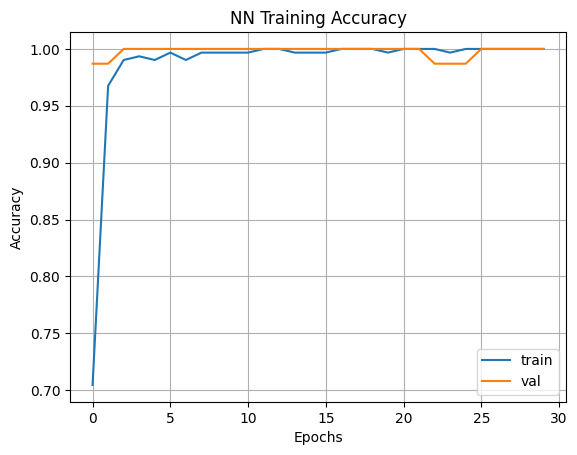

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("NN Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


In [30]:
nn_model.save('gesture_classifier.h5')
print("Model saved as gesture_classifier.h5")

Model saved as gesture_classifier.h5


In [31]:
import pickle

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("Label encoder saved as label_encoder.pkl")


Label encoder saved as label_encoder.pkl
